In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

from joblib import dump,load
#%matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('zomato.csv', on_bad_lines='skip')
data.shape

(51717, 17)

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data['votes'].describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
# explore columns related to the address
data.loc[:,['address','location','listed_in(city)']].sample(8,random_state=1)

,address,location,listed_in(city)
8157,"2A/3, 15th Cross, Green Garden Layout, Shirdi ...",Marathahalli,Brookefield
32498,"18, Shreenidhi Arcade, Maruthi Nagar Main Road...",BTM,Koramangala 6th Block
4679,"56, Near Passport Office, Outer Ring Road, Bel...",Bellandur,Bellandur
2445,"14/6, 9th Main Road, Opposite Water Tank, 100 ...",BTM,Bannerghatta Road
27316,"321/3A, Sharif Complex, Hosur Main Road, Oppos...",Hosur Road,Koramangala 4th Block
2735,"4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...",Shanti Nagar,Basavanagudi
34577,"9, Maruthi Nagar, Madiwala, BTM, Bangalore",BTM,Koramangala 6th Block
32233,"13th cross, 16th main, Tavarekere Main Road, B...",BTM,Koramangala 6th Block


In [8]:
# drop unnecessary columns
column_to_drop = ['address','url' ,'listed_in(city)', 'phone']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [9]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)'],
      dtype='object')

In [10]:
# check for duplicate values
print("Number of duplicates in dataset:  ",data.duplicated().sum())

Number of duplicates in dataset:   9809


In [11]:
# drop the duplicates
data.drop_duplicates(inplace=True)

In [12]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           10.15
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

In [13]:
# removed 'NEW' and '-' from rate coloumn and put NaN value.
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)

In [14]:
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           14.11
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
dtype: float64

In [15]:
## apply takes a function and applies it to all values of pandas series.

data['rate'] = data['rate'].astype(str)

## removed all '/5' and replace with ''
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))

## convert rate to float
data['rate'] = data['rate'].apply(lambda r: float(r))

In [16]:
data['rate'].head(2)

0    4.1
1    4.1
Name: rate, dtype: float64

In [17]:
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [18]:
# check for the second item in list
data.reviews_list[0][1]

('Rated 4.0',
 'RATED\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\nCheers')

In [19]:
# extract the rate for the first input from the review column
extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

In [20]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

In [21]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",data.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


In [22]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None

    ## checked give values is text or not, if it is text then removed 'Rated', convert string to float.
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]

    ## return average value
    return round((sum(rate)/len(rate)),1)

In [23]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [24]:
## Compare "Original Rate" vs "Rate extracted from Review List"
data.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
43076,4.0,4.0
49259,3.3,NaN
43257,4.5,4.2
30157,3.3,3.1
41110,3.8,4.0
34220,4.0,4.0
42520,3.0,3.3
45657,3.2,2.3
38218,3.3,3.9
4568,NaN,3.5


In [25]:
# get the before number of null values
data.rate.isna().sum()

5914

In [26]:
# finding rate = NaN and review_rate == not NaN
data.query('rate != rate & review_rate == review_rate')[:5]

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),review_rate
72,Spicy Tandoor,No,No,NaN,0,Banashankari,Quick Bites,NaN,North Indian,150,"[(Rated 4.0, RATED\n cost for chicken rolls i...",[],Delivery,4.5
90,Me And My Cake,No,No,NaN,0,Banashankari,Delivery,NaN,"Bakery, Desserts",500,"[(Rated 1.0, RATED\n Do not order anything. T...",[],Delivery,1.0
110,Hari Super Sandwich,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[(Rated 1.0, RATED\n I have been here many ti...",[],Delivery,1.0
116,Wood Stove,No,No,NaN,0,Banashankari,"Takeaway, Delivery",NaN,South Indian,150,"[(Rated 5.0, RATED\n Wow this food is great ?...",[],Delivery,5.0
138,Sri Murari Family Restaurant,No,No,NaN,0,Banashankari,Quick Bites,NaN,Biryani,250,"[(Rated 4.0, RATED\n This tiny mess near kath...",[],Delivery,4.5


In [27]:
## finding index where rate==NaN and review_rate== not NaN
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate']

In [28]:
# update the number of null values now
data.rate.isna().sum()

4861

In [29]:
# check now
((data.isna().sum()/data.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           11.60
votes                           0.00
location                        0.03
rest_type                       0.41
dish_liked                     48.22
cuisines                        0.09
approx_cost(for two people)     0.60
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
review_rate                    25.71
dtype: float64

In [30]:
#Drop the review_rate column
data.drop(columns='review_rate',axis=1,inplace=True)

In [31]:
data.rate.isna().sum()

4861

In [32]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [33]:
# check shape
data.shape

(36840, 13)

In [34]:
data.isna().sum() #Here count 0 means there are no missing values

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                        121
dish_liked                     15277
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
dtype: int64

In [35]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [36]:
## rename 'approx_cost(for two people)' to 'average_cost'
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [37]:
# check for percentage of null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
location            0.00
rest_type           0.33
dish_liked         41.46
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
dtype: float64

In [38]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [39]:
data.dish_liked[:2]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
Name: dish_liked, dtype: object

In [40]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

118363

In [41]:
# Now collect the unique dish name
menu_set = set(menu_list)

In [42]:
def clear_text(t):
    return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')

In [43]:
data['process_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [44]:
data['process_text']

0        RATED\n  A beautiful place to dine in.The inte...
1        RATED\n  Had been here for dinner with family....
2        RATED\n  Ambience is not that good enough and ...
3        RATED\n  Great food and proper Karnataka style...
4        RATED\n  Very good restaurant in neighbourhood...
                               ...                        
51709    RATED\n  Ambience- Big and spacious lawn was u...
51711    RATED\n  A fine place to chill after office ho...
51712    RATED\n  Food and service are incomparably exc...
51715    RATED\n  Nice and friendly place and staff is ...
51716    RATED\n  Great ambience , looking nice good se...
Name: process_text, Length: 36832, dtype: object

In [45]:
# here we removed all above mentioned characters
data['process_text'] = data.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())

In [46]:
# check part of reviews text for the first restaurant
data.process_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

In [47]:
data.dish_liked.nunique()

5250

In [48]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [49]:
# As we discussed above here we are using 'menu_set' and 'process_text' data. Put it into liked dishes list.
menu_set.intersection(data.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [50]:
#create a new column for the reviewed dish
data['dish_n_review'] = data.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [51]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
32901,NaN,"kheer, halwa"
44323,NaN,"tikka, chicken, shawarma, prawn, rice"
6479,NaN,
11046,NaN,rice
50112,NaN,"coffee, cappuccino"


In [52]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [53]:
del menu_list
del menu_set

In [54]:
# Drop the review_rate column
data.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [55]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
location           0.000
rest_type          0.329
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
process_text       0.000
dtype: float64

In [56]:
data.shape

(36832, 14)

In [57]:
#####  DATA VISUALISATIONS

Mean is :  3.7208921589921804


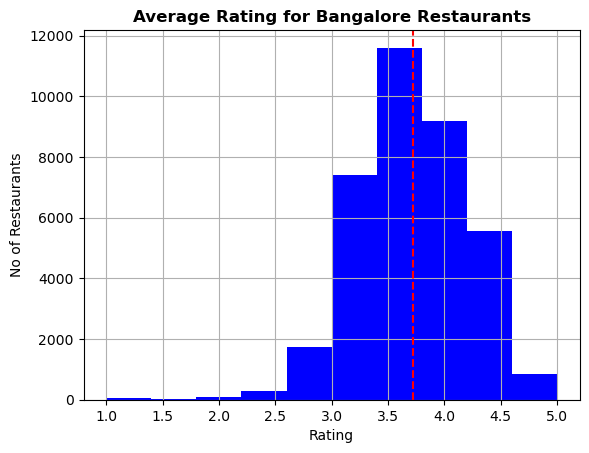

In [58]:
data.rate.hist(color='blue')
plt.axvline(x= data.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print("Mean is : ",data.rate.mean())

In [59]:
data.name.value_counts().head()

name
Onesta               85
Cafe Coffee Day      84
Empire Restaurant    69
Kanti Sweets         66
Just Bake            62
Name: count, dtype: int64

Text(0.5, 1.0, 'Name Vs Number of Restaurants')

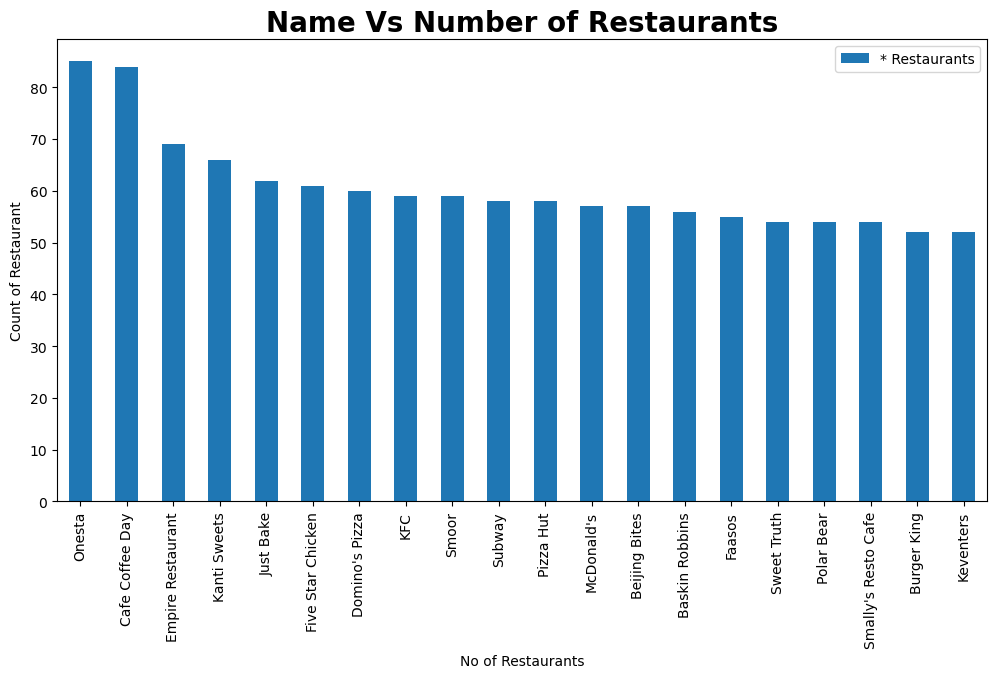

In [60]:
plt.figure(figsize=(12,6))
ax =data.name.value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel('No of Restaurants')
plt.ylabel('Count of Restaurant')
plt.title("Name Vs Number of Restaurants", fontsize=20, weight='bold')

online_order
Yes    24969
No     11863
Name: count, dtype: int64

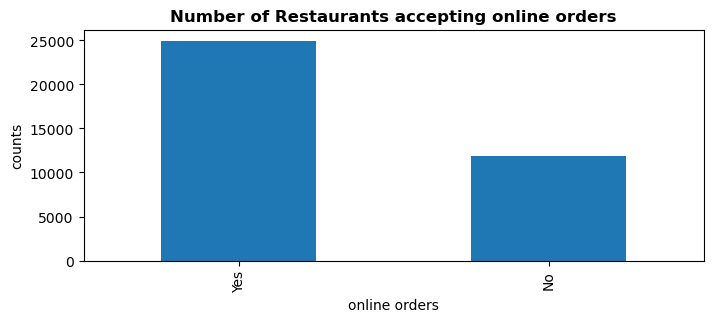

In [61]:
plt.figure(figsize=(8,3))
ax =data.online_order.value_counts().plot(kind='bar')
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')
plt.ylabel('counts')

data.online_order.value_counts()

book_table
No     30799
Yes     6033
Name: count, dtype: int64

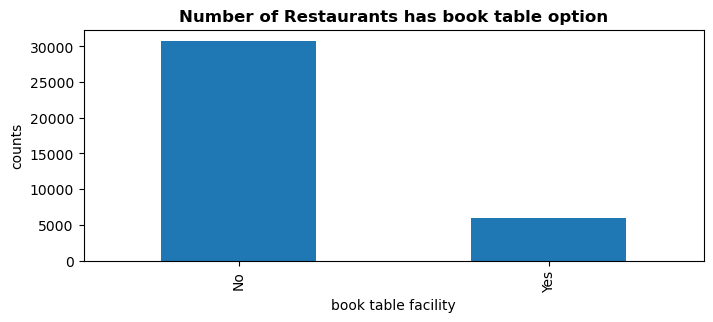

In [62]:
plt.figure(figsize=(8,3))
ax =data.book_table.value_counts().plot(kind='bar')
plt.title('Number of Restaurants has book table option', weight='bold')
plt.xlabel('book table facility')
plt.ylabel('counts')

data.book_table.value_counts()

Text(0.5, 1.0, 'Location')

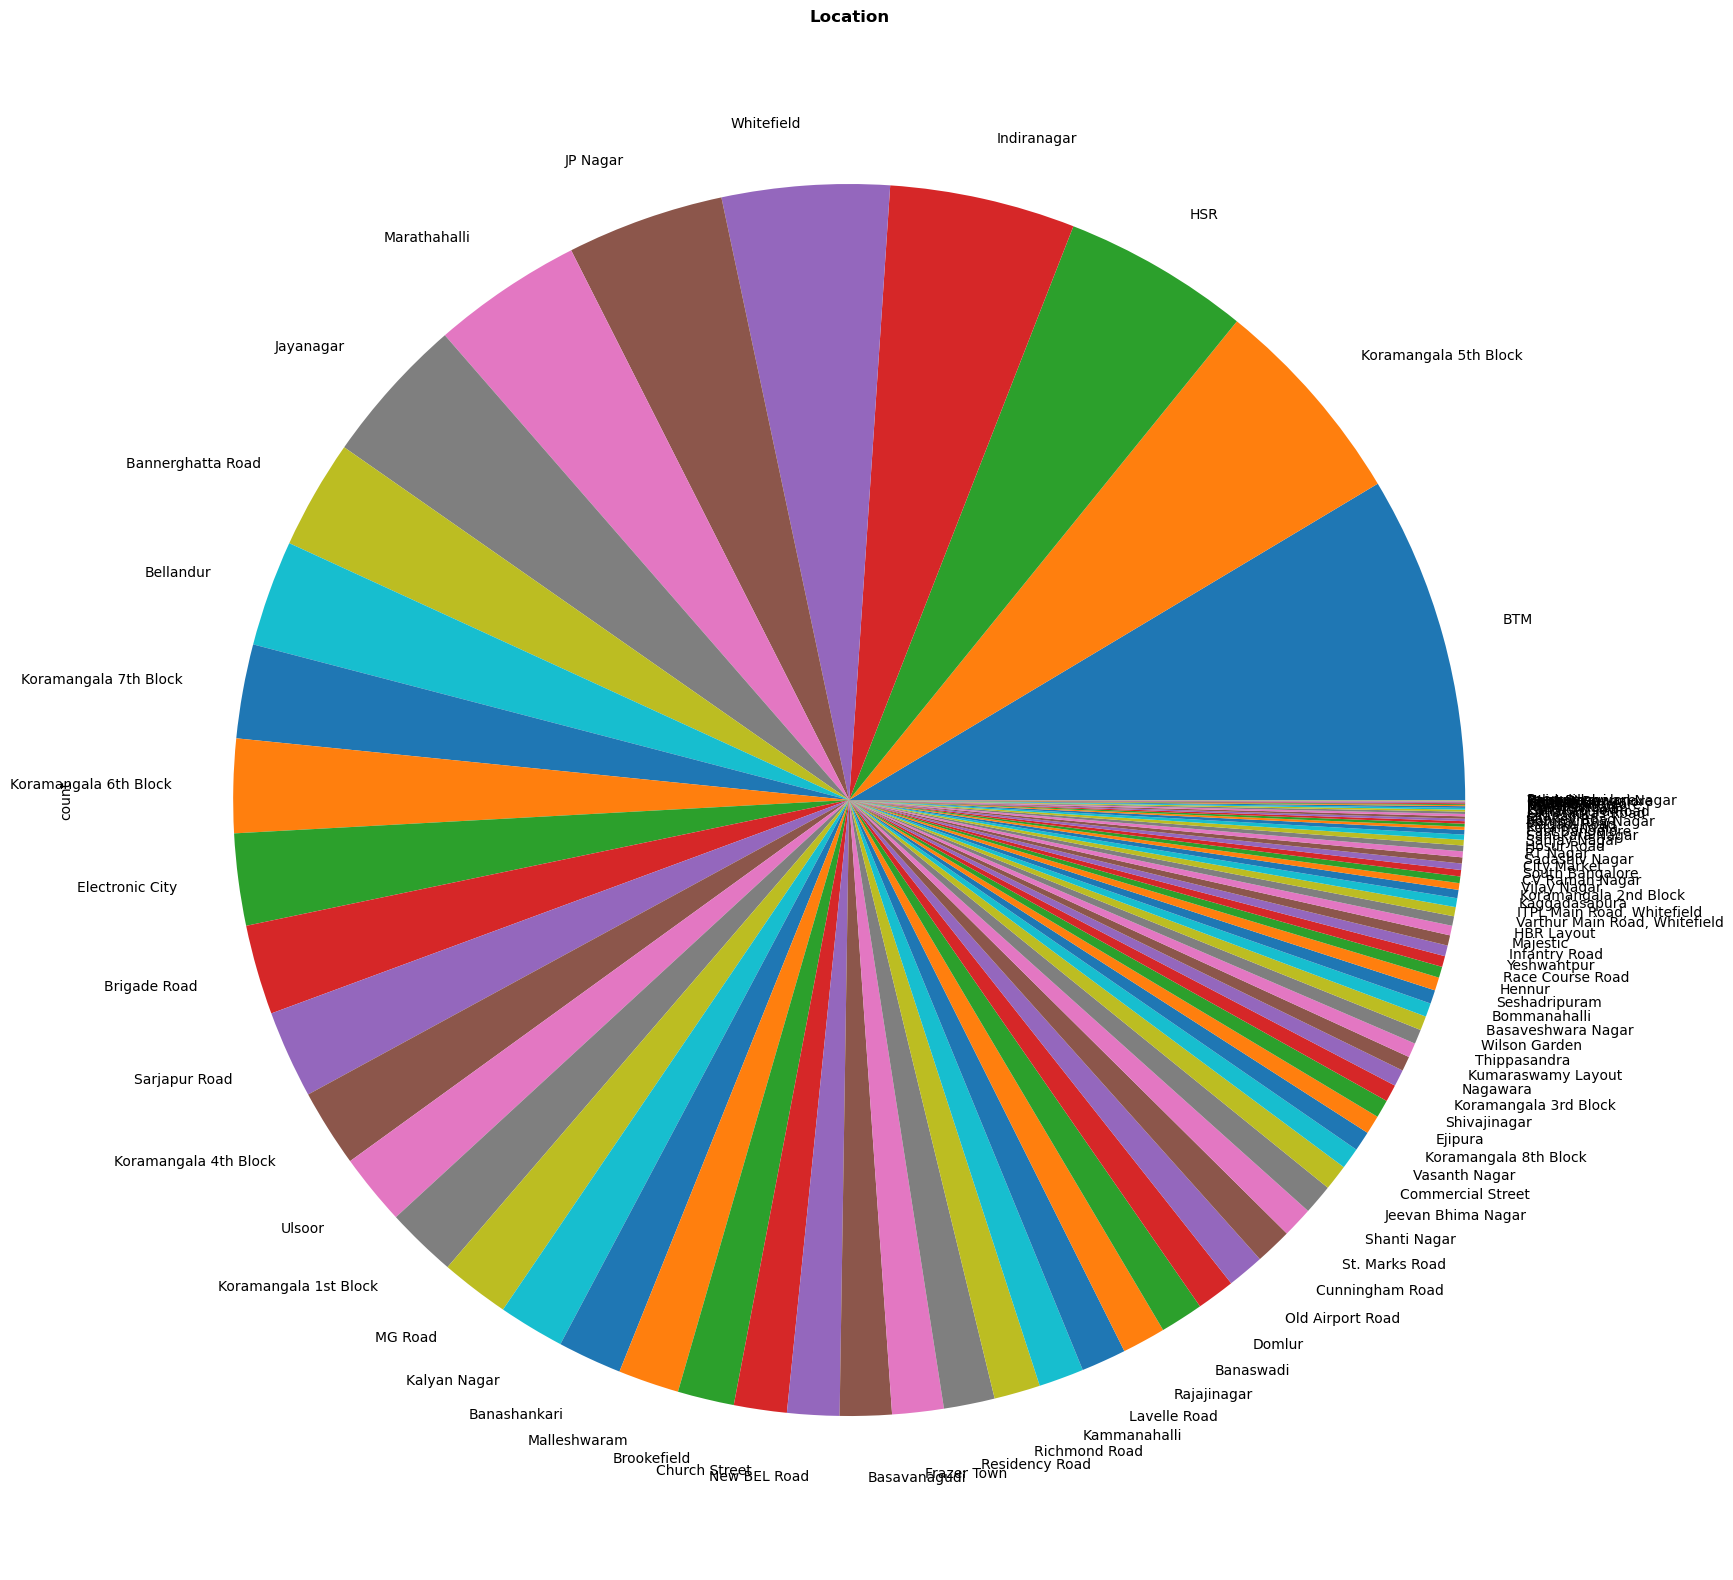

In [63]:
plt.figure(figsize=(20,20))
ax =data.location.value_counts().plot(kind='pie')
plt.title('Location', weight='bold')

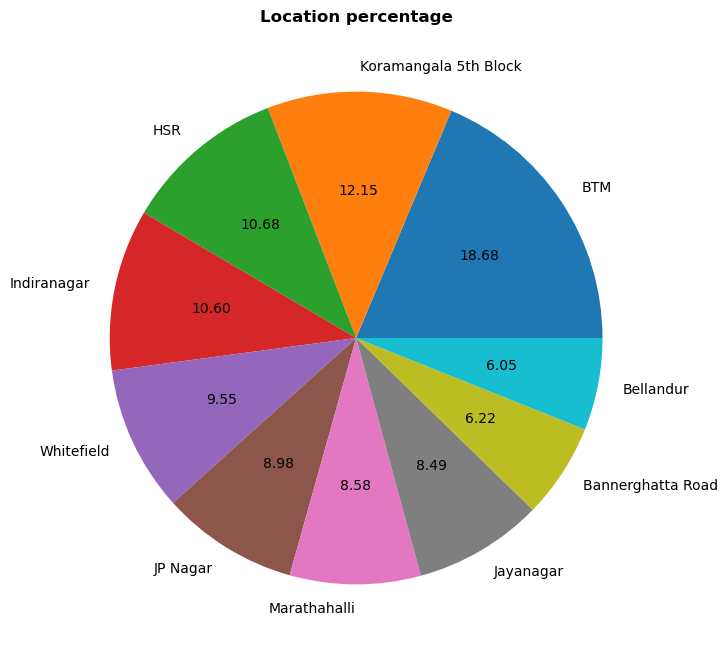

In [64]:
plt.figure(figsize=(8,8))
values = data.location.value_counts()[:10]
labels = data['location'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

Text(0, 0.5, 'counts')

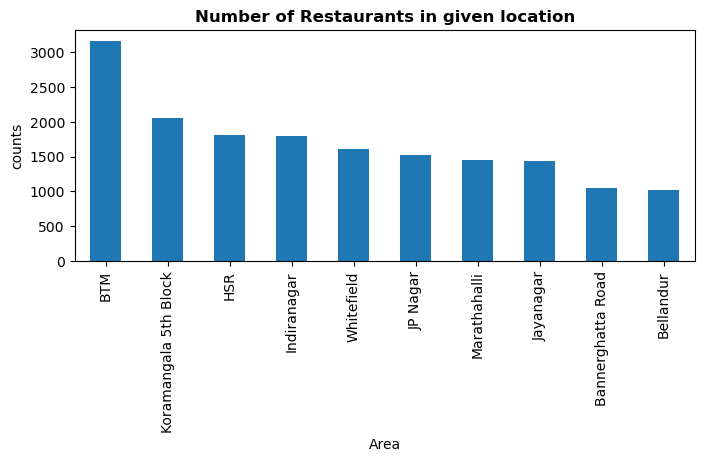

In [65]:
plt.figure(figsize=(8,3))
ax =data.location.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants in given location', weight='bold')
plt.xlabel('Area')
plt.ylabel('counts')

In [66]:
data['location'].nunique() ## Neighbourhoods in banglore

92

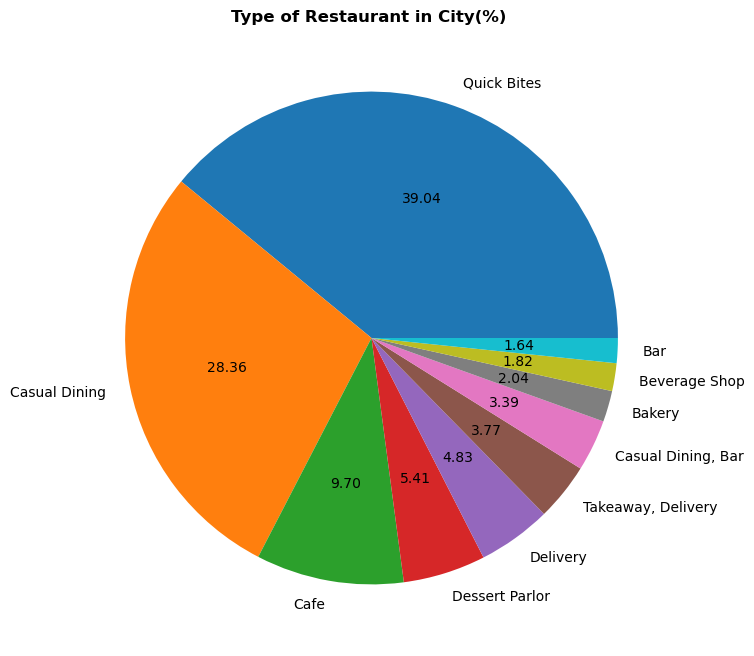

In [67]:
plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

Text(0, 0.5, 'count')

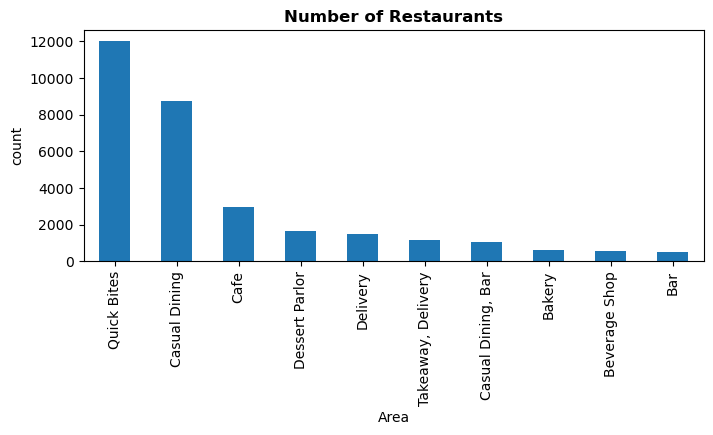

In [68]:
plt.figure(figsize=(8,3))
ax =data.rest_type.value_counts()[:10].plot(kind='bar')
plt.title('Number of Restaurants', weight='bold')
plt.xlabel('Area')
plt.ylabel('count')

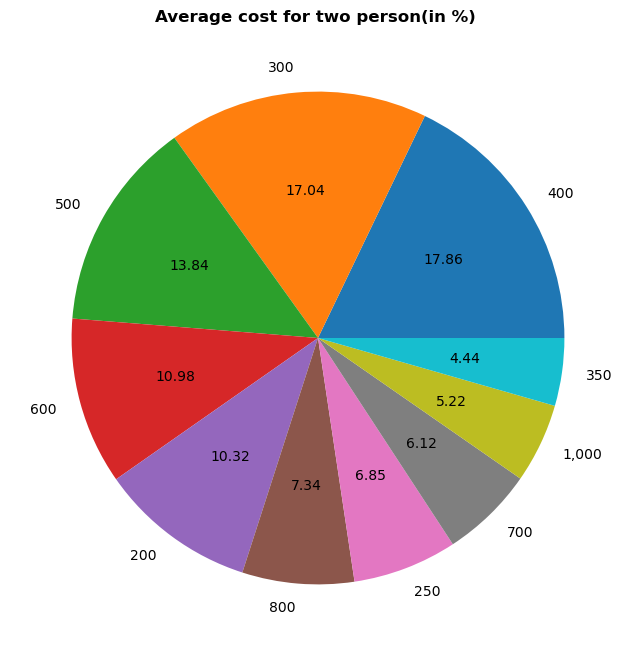

In [69]:
plt.figure(figsize=(8,8))
values = data.average_cost.value_counts()[:10]
labels = data['average_cost'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.show()

In [70]:
data.dish_liked.nunique()

7474

In [71]:
#lets delete the nulll values

data1 = data.copy()

dishes_data = data1[data1.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

In [72]:
dishes_data.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location             0
rest_type          121
dish_liked           0
cuisines             0
average_cost         0
reviews_list         0
menu_item            0
listed_in(type)      0
process_text         0
dtype: int64

In [73]:
dishes_data.dish_liked[:10]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                              chicken
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

In [74]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in dishes_data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [75]:
dish_count[:20] #lets see favourite top 20 dishes

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana',
 'thai green curry',
 'paneer tikka',
 'dum biryani',
 'chicken biryani',
 'churros',
 'cannelloni',
 'minestrone soup',
 'hot chocolate',
 'pink sauce pasta',
 'salsa']

Text(0, 0.5, 'Count')

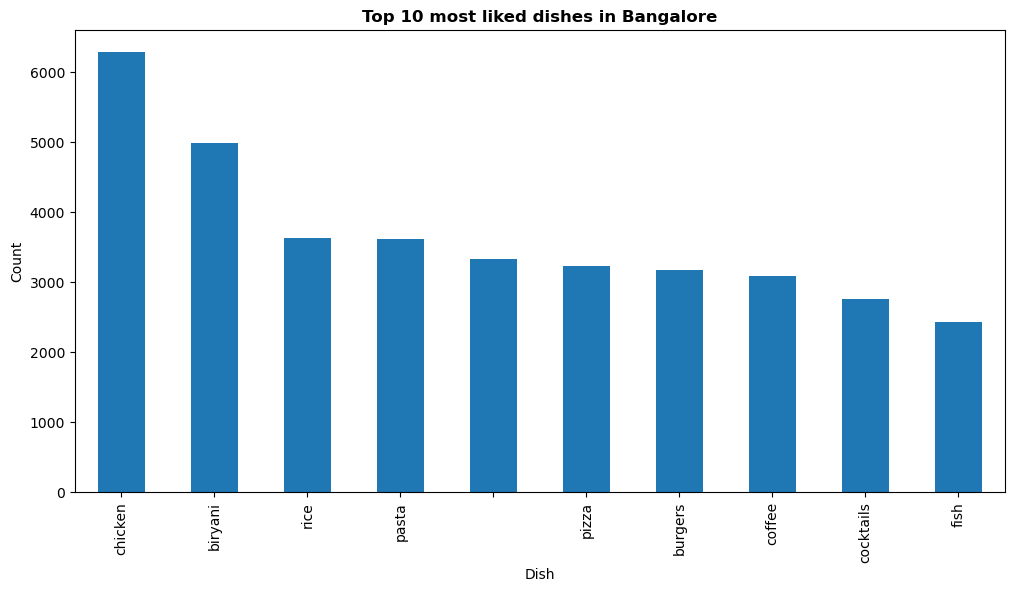

In [76]:
plt.figure(figsize=(12,6))
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 most liked dishes in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

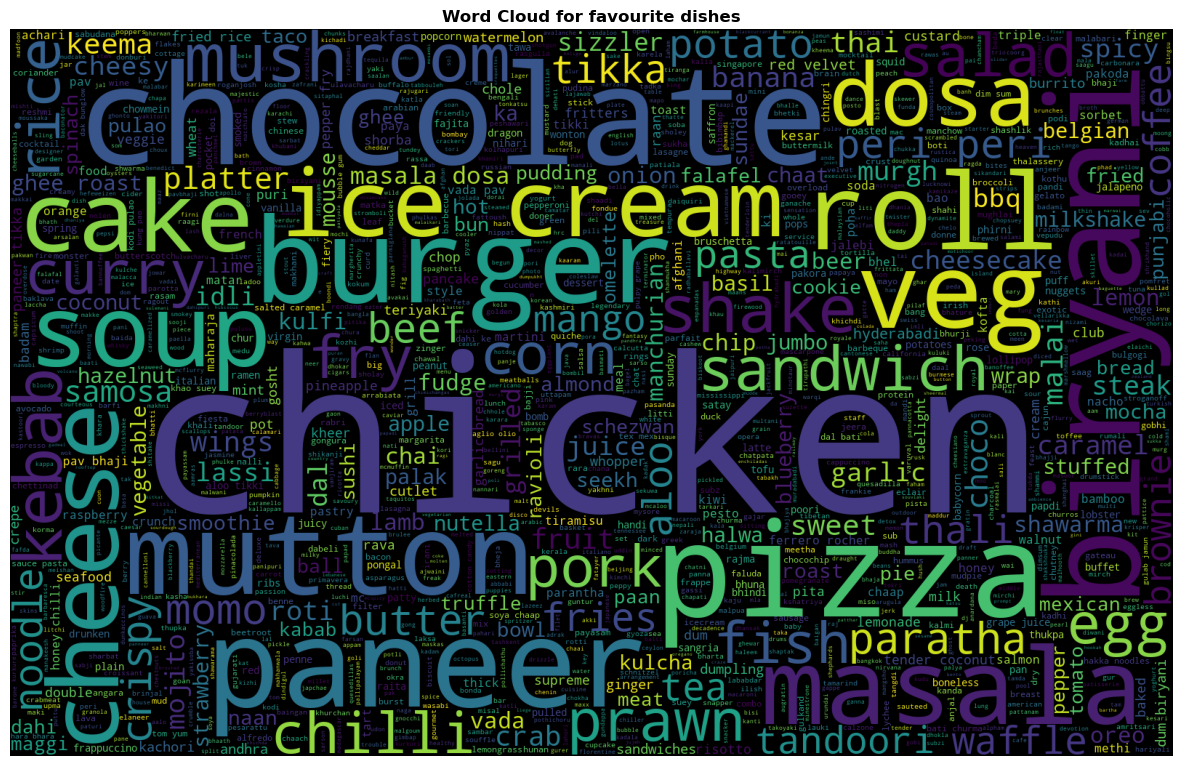

In [77]:
dish_set = set(dish_count)
dish_word_cloud = ', '.join(dish_set)

plt.figure( figsize=(15,10) )
wc = WordCloud(width=1600, height=1000,background_color="black", max_words=len(dish_word_cloud))
wc.generate(dish_word_cloud)
plt.imshow(wc, interpolation='bilinear')
plt.title('Word Cloud for favourite dishes',weight='bold')
plt.axis("off")
plt.imshow(wc)
plt.show()

In [78]:
cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

In [79]:
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

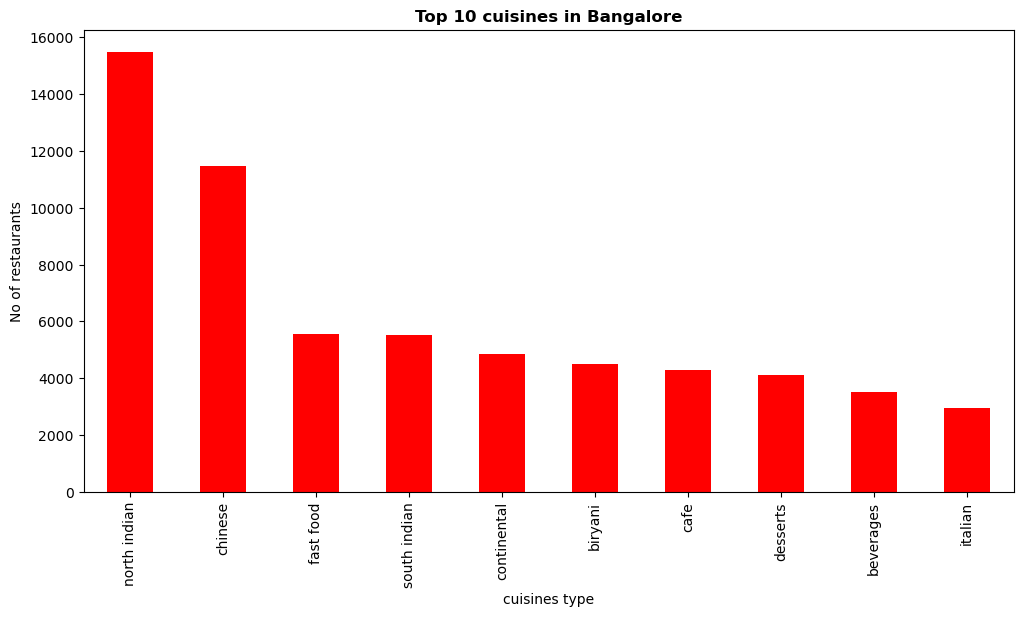

In [80]:
plt.figure(figsize=(12,6))
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

In [81]:
cuisines_set = set(cuisines_count)
cuisines_word_cloud = ', '.join(cuisines_set)

Text(0.5, 1.0, 'rate vs oline order')

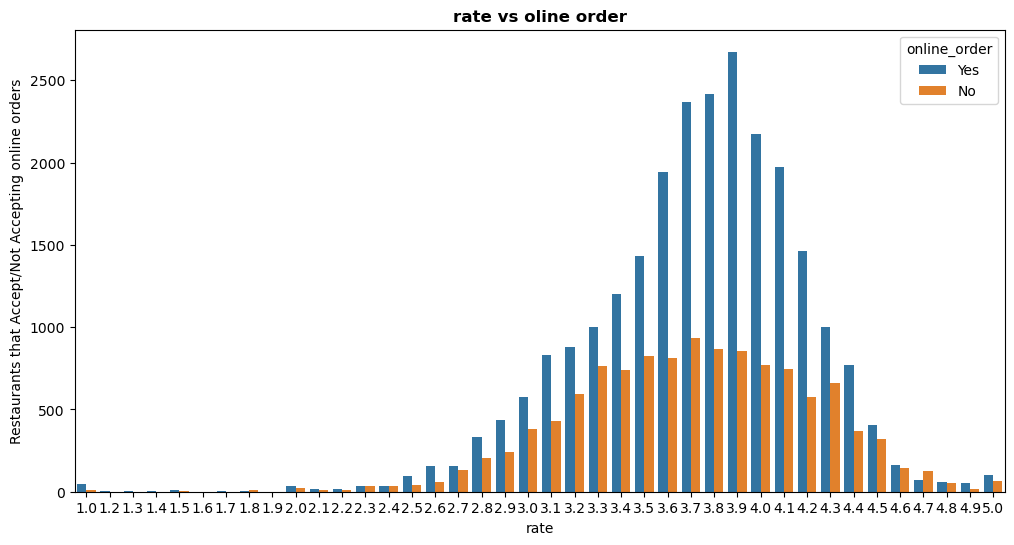

In [82]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')

In [83]:
#######   MODEL DEPLOYMENT ON DIFFERENT ALGORITHMS

In [84]:
# pd.get_dummies ==> Convert categorical variable into dummy/indicator variables.(OneHot encoding)

data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type),process_text
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,a beautiful place to dine in the interiors tak...
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,had been here for dinner with family turned o...
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,great food and proper karnataka style full mea...
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,very good restaurant in neighbourhood buffet ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","rice, chicken, fish","North Indian, Continental",800,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars,ambience- big and spacious lawn was used to ho...
51711,Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars,"a fine place to chill after office hours, reas..."
51712,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,"mocktails, chicken, decor, cocktails",Continental,"1,500","[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars,food and service are incomparably excellent t...
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,"2,500","[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars,nice and friendly place and staff is awesome ...


In [85]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'listed_in(type)', 'process_text'],
      dtype='object')

In [86]:
# drop redudant columns
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)','process_text'], inplace  =True)

In [87]:
# removed ',' between two words; then converted to categorical features
data['rest_type'] = data['rest_type'].str.replace(',' , '')
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

rest_type
Bites Quick       12006
Casual Dining      8720
Cafe               2982
Dessert Parlor     1665
Delivery           1486
Name: count, dtype: int64

In [88]:
# removed ',' between two words; then converted to categorical features
data['cuisines'] = data['cuisines'].str.replace(',' , '')
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

cuisines
Chinese Indian North                 1956
Indian North                         1907
Indian South                         1034
Chinese Indian Indian North South     941
Bakery Desserts                       698
Name: count, dtype: int64

In [89]:
# removed ',' between two words; then converted to string to int

data['average_cost'] = data['average_cost'].str.replace(',' , '')
data['average_cost'] = data['average_cost'].apply(int)

In [90]:
data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,Chinese Indian Mughlai North,800
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,Chinese Indian North Thai,800
2,San Churro Cafe,True,False,3.8,918,Banashankari,Cafe Casual Dining,Cafe Italian Mexican,800
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Bites Quick,Indian Indian North South,300
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,Indian North Rajasthani,600


In [91]:
# build x & y dataset
x = data.drop(['rate','name'],axis = 1)
y = data['rate']

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [93]:
dump(X_train, 'pkl_files/more_feature_X_train')
dump(X_test, 'pkl_files/more_feature_X_test')
dump(y_train, 'pkl_files/more_feature_y_train')
dump(y_test, 'pkl_files/more_feature_y_test')

['pkl_files/more_feature_y_test']

In [94]:
X_train = load('pkl_files/more_feature_X_train')
X_test = load('pkl_files/more_feature_X_test')
y_train = load('pkl_files/more_feature_y_train')
y_test = load('pkl_files/more_feature_y_test')

In [95]:
X_train.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
34072,False,True,1390,Koramangala 5th Block,Lounge,Continental Indian North,1400
51088,True,True,1218,Whitefield,Pub,American Asian Mexican,1200


In [96]:
enc = OneHotEncoder( handle_unknown='ignore')

In [97]:
## ALWAYS AVOID DATA LEAKAGE

# this method is for training data set
def one_hot_fit_transform(df,name):
    output_data = df[name].values.reshape(-1, 1)
    return enc.fit_transform(output_data).toarray()

# this method is for test data set
def one_hot_transform(df,name):
    output_data1 = df[name].values.reshape(-1, 1)
    return enc.transform(output_data1).toarray()

In [98]:
# one hot encoding apply to 'rest_type' features on train/test dataset
tr_dummy_rest_type = one_hot_fit_transform(X_train,'rest_type' )
te_dummy_rest_type= one_hot_transform(X_test,'rest_type' )

# one hot encoding apply to 'location' features on train/test dataset
tr_dummy_city = one_hot_fit_transform(X_train,'location' )
te_dummy_city= one_hot_transform(X_test,'location')

# one hot encoding apply to 'cuisines' features on train/test dataset
tr_dummy_cuisines = one_hot_fit_transform(X_train,'cuisines' )
te_dummy_cuisines=one_hot_transform(X_test,'cuisines')

In [99]:
tr_dummy_rest_type.shape, te_dummy_rest_type.shape

((25782, 67), (11050, 67))

In [100]:
tr_dummy_city.shape, te_dummy_city.shape

((25782, 92), (11050, 92))

In [101]:
tr_dummy_cuisines.shape, te_dummy_cuisines.shape

((25782, 1674), (11050, 1674))

In [102]:
import pandas as pd
import numpy as np

# Assuming you have NumPy arrays tr_dummy_rest_type, tr_dummy_city, and tr_dummy_cuisines

# Combine the NumPy arrays using np.column_stack
tr = pd.DataFrame(np.column_stack([tr_dummy_rest_type, tr_dummy_city, tr_dummy_cuisines]))

# Now, tr contains all the one-hot encoded features combined horizontally


l1=X_train.values.tolist()
l2=tr.values.tolist()

for i in range(len(l1)):
    l1[i].extend(l2[i])

X_train=pd.DataFrame(l1,columns=X_train.columns.tolist()+tr.columns.tolist())
X_train.shape

(25782, 1840)

In [103]:
## combine all 'one-hot' encoded features as te.
te =pd.DataFrame(np.column_stack([ te_dummy_rest_type,te_dummy_city,te_dummy_cuisines]))

## CONCAT both dataframe ### ie Te and X_test(original dataframe)
## https://stackoverflow.com/questions/45963799/pandas-concat-resulting-in-nan-rows

l3=X_test.values.tolist()
l4=te.values.tolist()
for i in range(len(l3)):
    l3[i].extend(l4[i])

X_test=pd.DataFrame(l3,columns=X_test.columns.tolist()+te.columns.tolist())
X_test.shape

(11050, 1840)

In [104]:
# after onehot encoding DONE. 'location','rest_type','cuisines' are redundant features. REMOVE them.

X_train =X_train.drop(['location','rest_type','cuisines'],axis = 1)
X_test =X_test.drop(['location','rest_type','cuisines'],axis = 1)

In [105]:
X_train.head(3)

,online_order,book_table,votes,average_cost,0,1,2,3,4,5,...,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832
0,False,True,1390,1400,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,True,1218,1200,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,False,34,300,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
print(x.shape)
print(y.shape)

(36832, 7)
(36832,)


In [107]:
# checking final train set shape
X_train.shape, y_train.shape

((25782, 1837), (25782,))

In [108]:
# # checking final test set shape
X_test.shape, y_test.shape

((11050, 1837), (11050,))

In [109]:
dump(X_train, 'max_features_pkl/more_feature_X_train')
dump(X_test, 'max_features_pkl/more_feature_X_test')
dump(y_train, 'max_features_pkl/more_feature_y_train')
dump(y_test, 'max_features_pkl/more_feature_y_test')

['max_features_pkl/more_feature_y_test']

In [110]:
X_train= load('max_features_pkl/more_feature_X_train')
X_test= load('max_features_pkl/more_feature_X_test')
y_train= load('max_features_pkl/more_feature_y_train')
y_test= load('max_features_pkl/more_feature_y_test')

In [111]:
from sklearn.metrics import  make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


def mse(y, y_pred):
    return np.mean((y_pred - y)**2)

mse_scorer = make_scorer(mse, greater_is_better=False)

In [112]:
import random

rand_pred= np.zeros(y_test.shape[0])
for i in range(y_test.shape[0]):
    rand_probs = round(random.uniform(1.0, 5.0),2)
    rand_pred[i] = rand_probs

mse(y_test, rand_pred)

2.125232968325792

In [113]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

mse(y_test, y_pred_lr)

0.12780356343783544

In [114]:
# SGD REGRESSOR

from sklearn import linear_model

sgdReg = linear_model.SGDRegressor()
sgdReg.fit(X_train,y_train)
y_pred_sgdr = sgdReg.predict(X_test)

mse(y_test, y_pred_sgdr)

1.5381095322244004e+30

In [115]:
# GBDT REGRESSOR

from xgboost import XGBClassifier
y_train = np.round(y_train).astype(int)
# Map values in y_train to match the desired classes
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
y_train = np.array([class_mapping[y] for y in y_train])

# Now, y_train should contain the desired integer class labels


xgb = XGBClassifier(n_jobs=-1, eval_metric='rmse', random_state=1,verbose_eval=10)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

mse(y_test, y_pred_xgb)

0.9855031674208145

In [116]:
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

mse(y_test, y_pred_rfr)

1.03502557203211